In [22]:
import pandas as pd
import tensorflow as rf
from keras.layers import Dense,LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv(r"C:\Users\aashutosh kumar\Downloads\AAPL.csv")
dataframe.head(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
data = dataframe.reset_index()["close"]

In [4]:
data.head(3)

0    132.045
1    131.780
2    130.280
Name: close, dtype: float64

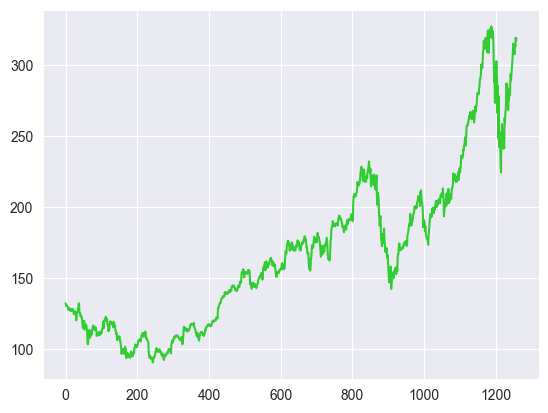

In [5]:
sns.set_style("darkgrid")
plt.plot(data,color = "limegreen")

In [6]:
scaler = MinMaxScaler()
data_arr = np.array(data)
data = scaler.fit_transform(data_arr.reshape(-1,1))

In [7]:
train_size = int(len(data)*0.70)
test_size = int(len(data)-train_size)
print(train_size , test_size)
train_data,test_data = data[0:train_size,:],data[train_size:len(data),:1]

880 378


In [8]:
train_data.shape,test_data.shape

((880, 1), (378, 1))

In [9]:
def create_dataset(dataset,time_step = 1):
    X = []
    Y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X),np.array(Y)

In [10]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
print(X_train.shape), print(y_train.shape)


(779, 100)
(779,)


(None, None)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_train.shape

(779, 100, 1)

In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50,return_sequences = True))

model.add(LSTM(50))
model.add(Dense(50,activation = "relu"))
model.add(Dense(25,activation = "relu"))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 2

In [15]:
m = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64)


Epoch 1/100
13/13 [==============================] - 8s 141ms/step - loss: 0.0234 - val_loss: 0.0953
Epoch 2/100
13/13 [==============================] - 1s 48ms/step - loss: 0.0043 - val_loss: 0.0106
Epoch 3/100
13/13 [==============================] - 1s 47ms/step - loss: 0.0018 - val_loss: 0.0065
Epoch 4/100
13/13 [==============================] - 1s 48ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 5/100
13/13 [==============================] - 1s 50ms/step - loss: 0.0012 - val_loss: 0.0077
Epoch 6/100
13/13 [==============================] - 1s 47ms/step - loss: 0.0010 - val_loss: 0.0180
Epoch 7/100
13/13 [==============================] - 1s 49ms/step - loss: 0.0011 - val_loss: 0.0155
Epoch 8/100
13/13 [==============================] - 1s 49ms/step - loss: 9.6020e-04 - val_loss: 0.0097
Epoch 9/100
13/13 [==============================] - 1s 49ms/step - loss: 9.2071e-04 - val_loss: 0.0093
Epoch 10/100
13/13 [==============================] - 1s 54ms/step - loss: 9.0214e-04 - val

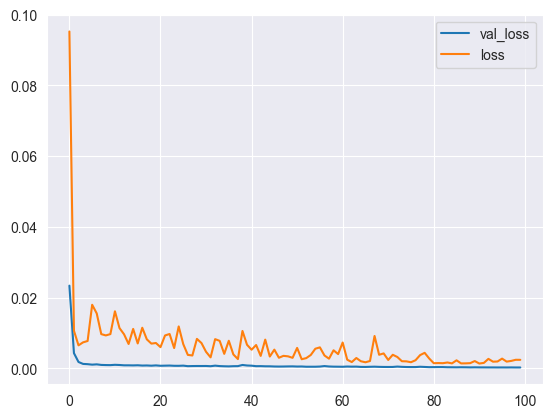

In [19]:
sns.set_style("darkgrid")
plt.plot(m.history["loss"])
plt.plot(m.history["val_loss"])
plt.legend(["val_loss","loss"])

In [20]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 20ms/step


In [21]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
math.sqrt(mean_squared_error(y_train,train_predict))

146.9419353797189

In [25]:
math.sqrt(mean_squared_error(ytest,test_predict))

242.04304731405037

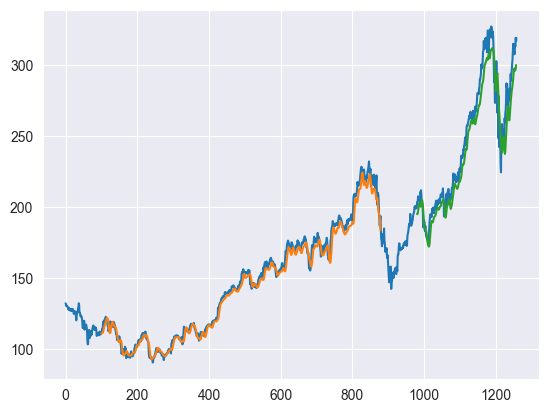

In [29]:
look_back=100
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()